In [1]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    # messages have the type "list".
    # The add_messages function appends messages to the list, rather than ov`erwriting them
    messages: Annotated[list, add_messages]
graph_builder = StateGraph(State)

In [3]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import os

load_dotenv()

llm = ChatOpenAI(model="gpt-4o-mini")

In [4]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

In [7]:
graph_builder.set_entry_point("chatbot")
graph_builder.add_node("chatbot", chatbot)
graph_builder.set_finish_point("chatbot")

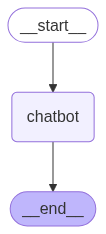

In [8]:
graph = graph_builder.compile()
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [ ]:
# Run the chatbot
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

Assistant: Hello! How can I assist you today?
Assistant: Hello! How can I assist you today?
Assistant: Hello! How can I assist you today?
Assistant: Hello! How can I assist you today?
Assistant: Langgraph Learning appears to be a concept that combines elements of language learning, possibly using graph-based methods to enhance the process. While there isn't a widely recognized framework or method specifically called "Langgraph Learning," I can provide some insights into how language learning can be enhanced through graph-based techniques.

### Potential Concepts of Langgraph Learning

1. **Graph-based Language Models**:
   - Using graph structures to represent relationships between words, phrases, or concepts can facilitate understanding and learning.
   - For instance, semantic graphs can connect synonyms, antonyms, and related words, helping learners see connections and expand their vocabulary.

2. **Knowledge Graphs for Language Learning**:
   - Knowledge graphs can provide a struct